**1. Import libraries**

In [43]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


**2. Dataset**

In [44]:
#Read dataset

df=pd.read_csv('drive/MyDrive/Colab Notebooks/MACHINE LEARNING/Lineal Regression/cancer_probabilities.csv')

print(df.shape)
print(df.info())
print(df.columns)
print(df.head())
print(df.tail(10))

(50, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sr No.                 50 non-null     int64  
 1   Smoking Habit          34 non-null     object 
 2   Drinking Habit         34 non-null     object 
 3   Biking Habit           50 non-null     object 
 4   Walking Habit          50 non-null     object 
 5   Jogging Habit          50 non-null     object 
 6   Probability of Cancer  50 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB
None
Index(['Sr No.', 'Smoking Habit', 'Drinking Habit', 'Biking Habit',
       'Walking Habit', 'Jogging Habit', 'Probability of Cancer'],
      dtype='object')
   Sr No. Smoking Habit Drinking Habit Biking Habit Walking Habit  \
0       1         Heavy       Frequent          Low           Low   
1       2    Occasional       Moderate         High         

**3. Preprocessing**

In [45]:
#Obtain sublevels per column

for col in df.columns:
    print(f'Columna {col}: {df[col].nunique()} sublevels')


Columna Sr No.: 50 sublevels
Columna Smoking Habit: 3 sublevels
Columna Drinking Habit: 3 sublevels
Columna Biking Habit: 3 sublevels
Columna Walking Habit: 3 sublevels
Columna Jogging Habit: 3 sublevels
Columna Probability of Cancer: 15 sublevels


In [46]:
#Statistical info for numeric columns
df.describe()


,Sr No.,Probability of Cancer
count,50.00000,50.000000
mean,25.50000,0.407200
std,14.57738,0.325501
min,1.00000,0.010000
25%,13.25000,0.050000
50%,25.50000,0.375000
75%,37.75000,0.750000
max,50.00000,0.900000


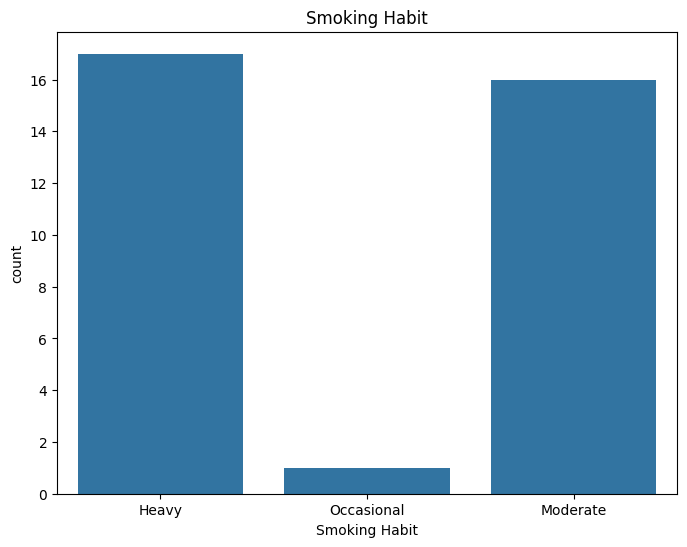

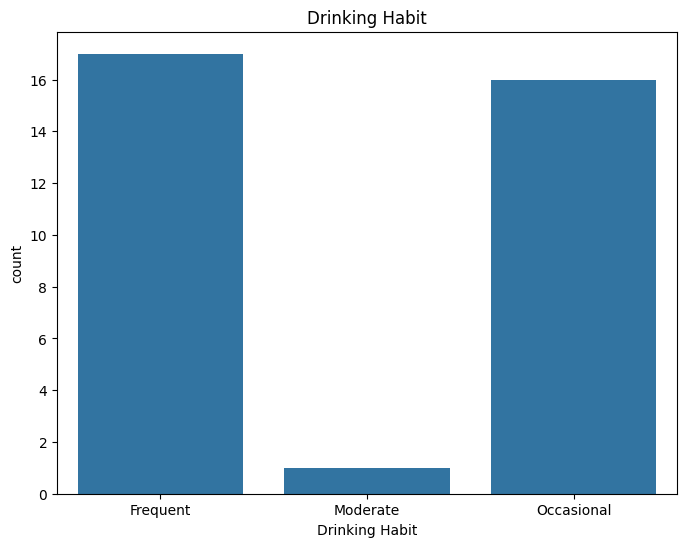

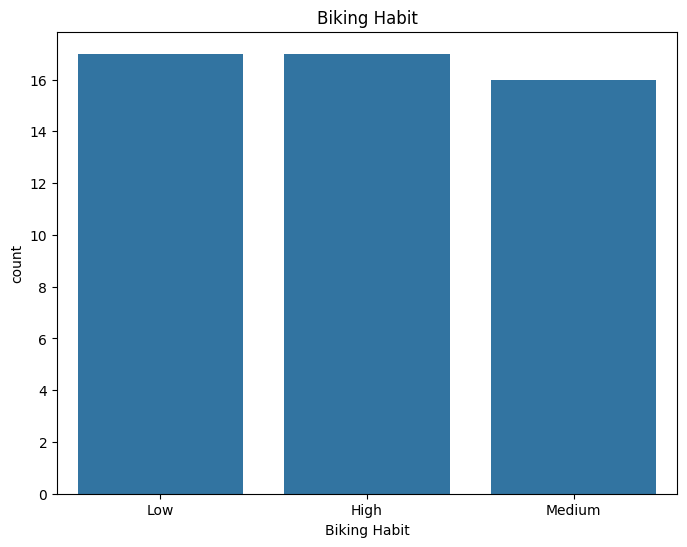

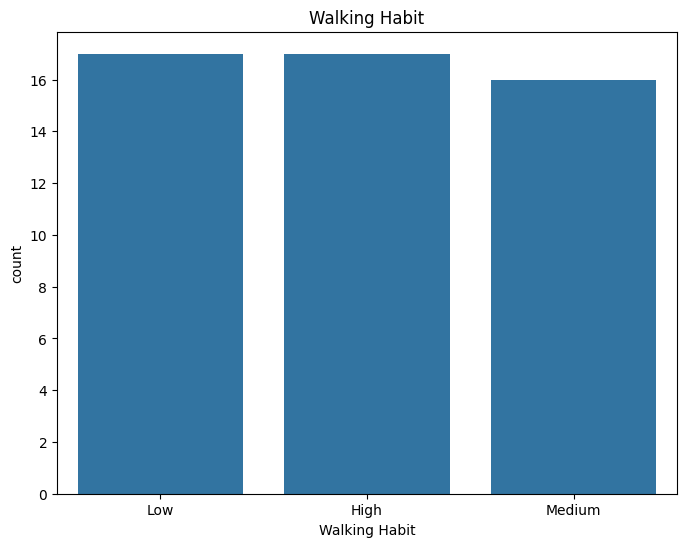

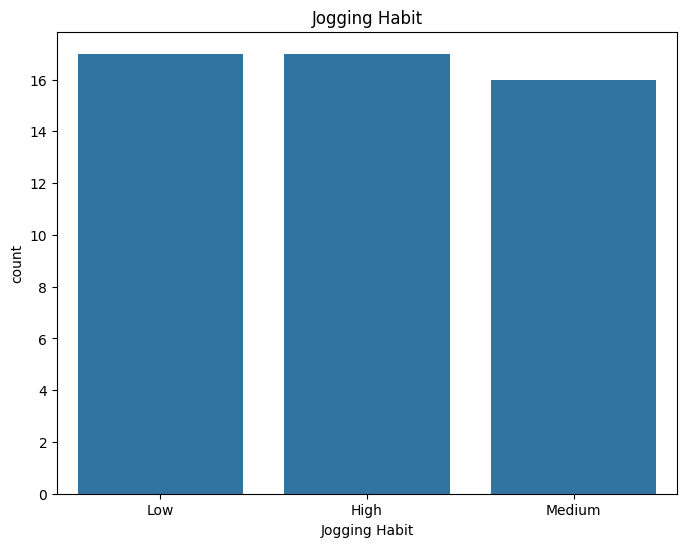

In [9]:
#Graph each column to analyse the data better

for column in df.select_dtypes('O'):
  plt.figure(figsize=(8, 6))
  sns.countplot(x=column, data=df)
  plt.title(column)
  plt.show()

Irrelevant colums

In [47]:
#We are going to delete the irrelevant columns

#Sr No. - Unique value per person, doesnot add value
df = df.drop(['Sr No.'], axis=1)

In [48]:
#Check new size of the dataframe
print(df.shape)

(50, 6)


Missing values

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


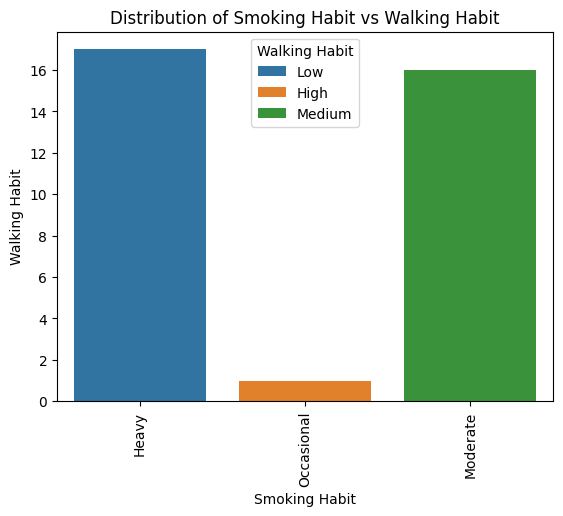

In [12]:
#We have some missing values for the columns Smoking Habits and Drinking Habits
#We are going to graphic these columns vs the other columns to see the relationship between them and then take a decission about how to input the missing values
#We dont delete rows since we have low data

sns.countplot(x='Smoking Habit', hue='Walking Habit', data=df)

plt.title('Distribution of Smoking Habit vs Walking Habit')
plt.xlabel('Smoking Habit')
plt.ylabel('Walking Habit')
plt.xticks(rotation=90)

plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


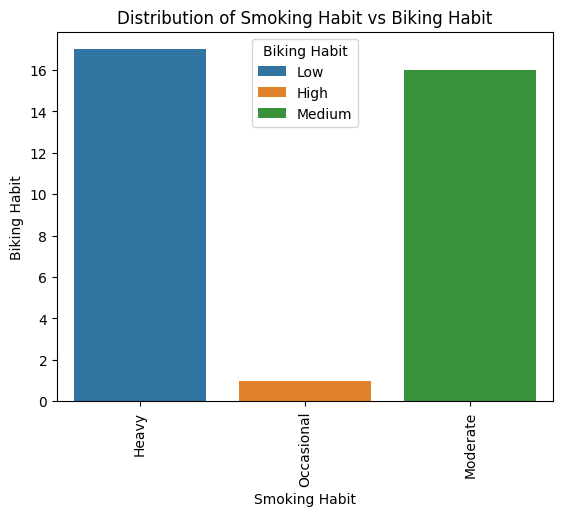

In [13]:
sns.countplot(x='Smoking Habit', hue='Biking Habit', data=df)

plt.title('Distribution of Smoking Habit vs Biking Habit')
plt.xlabel('Smoking Habit')
plt.ylabel('Biking Habit')
plt.xticks(rotation=90)

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


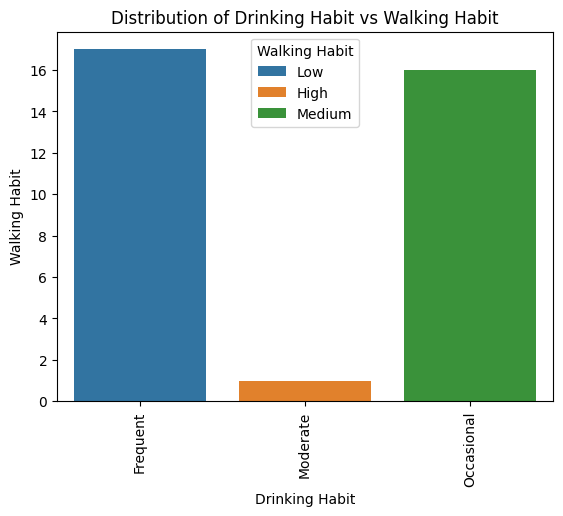

In [14]:
sns.countplot(x='Drinking Habit', hue='Walking Habit', data=df)

plt.title('Distribution of Drinking Habit vs Walking Habit')
plt.xlabel('Drinking Habit')
plt.ylabel('Walking Habit')
plt.xticks(rotation=90)

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


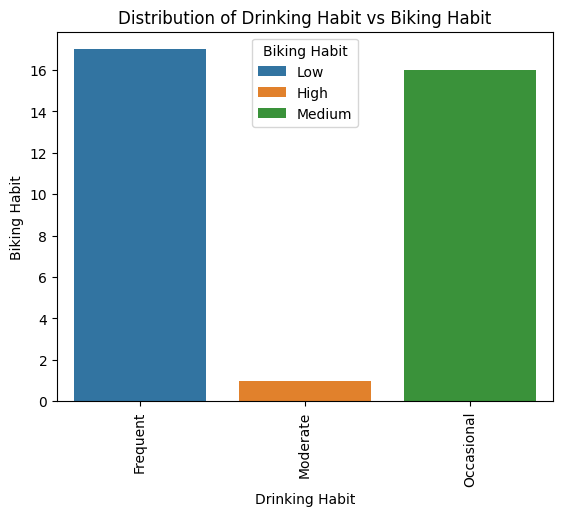

In [16]:
sns.countplot(x='Drinking Habit', hue='Biking Habit', data=df)

plt.title('Distribution of Drinking Habit vs Biking Habit')
plt.xlabel('Drinking Habit')
plt.ylabel('Biking Habit')
plt.xticks(rotation=90)

plt.show()


In [22]:
#We can see that the most of the people with high Walking or Biking Habits tend to Smoke or Drink less
#and the people with low Walking or Biking Habits tend to Smoke or Drink more

#Then we are going to input the missing values with the previuos considerations
df.loc[(df['Smoking Habit'].isnull()) & (df['Walking Habit'] == 'High'), 'Smoking Habit'] = 'Occasional'
df.loc[(df['Smoking Habit'].isnull()) & (df['Walking Habit'] == 'Low'), 'Smoking Habit'] = 'Heavy'
df.loc[(df['Drinking Habit'].isnull()) & (df['Walking Habit'] == 'High'), 'Drinking Habit'] = 'Occasional'
df.loc[(df['Drinking Habit'].isnull()) & (df['Walking Habit'] == 'Low'), 'Drinking Habit'] = 'Frequent'

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Smoking Habit          50 non-null     object 
 1   Drinking Habit         50 non-null     object 
 2   Biking Habit           50 non-null     object 
 3   Walking Habit          50 non-null     object 
 4   Jogging Habit          50 non-null     object 
 5   Probability of Cancer  50 non-null     float64
dtypes: float64(1), object(5)
memory usage: 2.5+ KB
None


**4. Business Analytics**

Cancer probability

In [49]:
df['Probability of Cancer'].value_counts(normalize = True) * 100

,proportion
Probability of Cancer,
0.40,12.0
0.80,10.0
0.90,10.0
0.05,8.0
0.75,8.0
0.30,8.0
0.02,8.0
0.01,8.0
0.35,8.0


Probability of Cancer vs Walking Habit

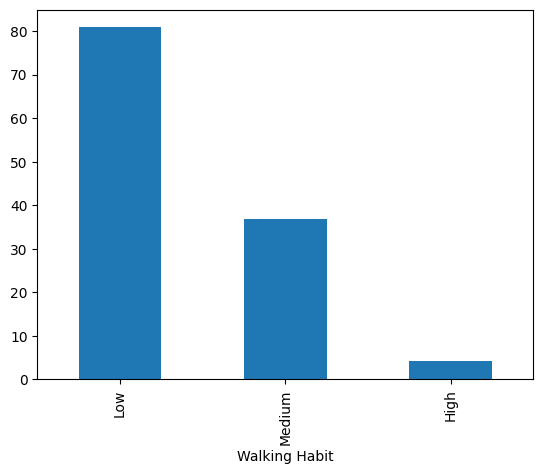

In [30]:
temp = df.groupby('Walking Habit')['Probability of Cancer'].mean().sort_values(ascending = False) * 100
temp.plot.bar();

Probability of Cancer vs Biking Habit



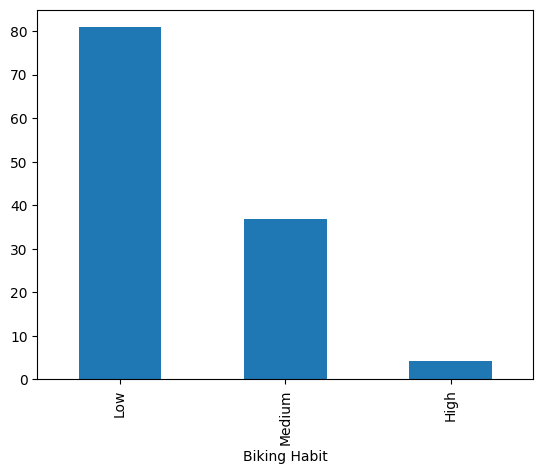

In [31]:
temp = df.groupby('Biking Habit')['Probability of Cancer'].mean().sort_values(ascending = False) * 100
temp.plot.bar();

Probability of Cancer vs Smoking Habit

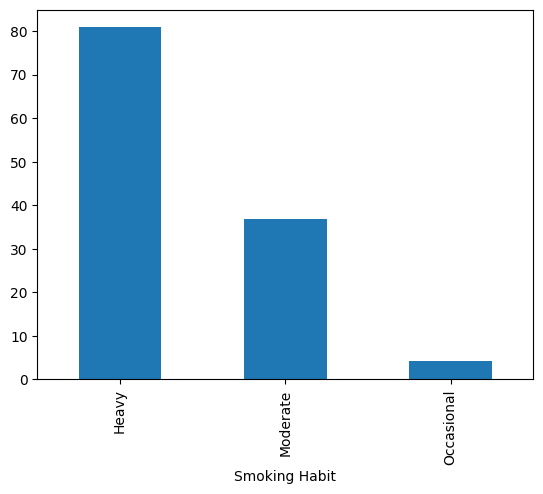

In [32]:
temp = df.groupby('Smoking Habit')['Probability of Cancer'].mean().sort_values(ascending = False) * 100
temp.plot.bar();

Probability of Cancer vs Drinking Habit

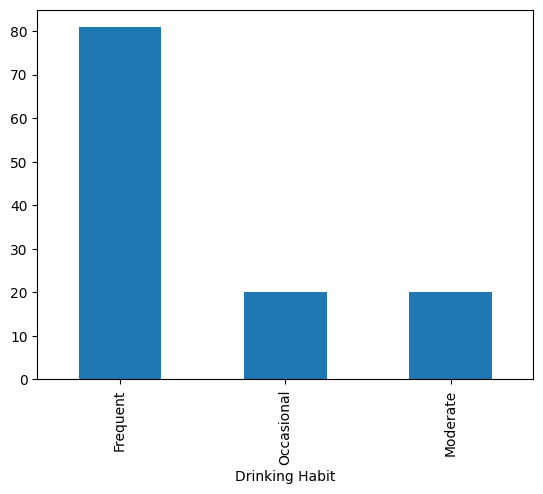

In [33]:
temp = df.groupby('Drinking Habit')['Probability of Cancer'].mean().sort_values(ascending = False) * 100
temp.plot.bar();

Conclusion:

The cancer probability can be infered as:



1.   High cancer probability
*   Low Walking and Biking Habits
*   Heavy Smoking and Drinking Habits


2.   Low cancer probability
*   High Walking and Biking Habits
*   Ocassional Smoking and Drinking Habits
















**4. ML Model**

In [50]:
#Create a copy of the model to use it in ML
df_ml=df.copy()

In [51]:
#Transform all the categorical variables to numeric variables

cat = df_ml.select_dtypes('O')

ohe = OneHotEncoder(sparse_output=False)
ohe.fit(cat)
cat_ohe = ohe.transform(cat)
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

cat_ohe.head(20)

,Smoking Habit_Heavy,Smoking Habit_Moderate,Smoking Habit_Occasional,Smoking Habit_nan,Drinking Habit_Frequent,Drinking Habit_Moderate,Drinking Habit_Occasional,Drinking Habit_nan,Biking Habit_High,Biking Habit_Low,Biking Habit_Medium,Walking Habit_High,Walking Habit_Low,Walking Habit_Medium,Jogging Habit_High,Jogging Habit_Low,Jogging Habit_Medium
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [52]:
#Select numerical columns
num = df.select_dtypes('number').reset_index(drop = True)


In [53]:
#Unify to create dataframe
df_ml = pd.concat([cat_ohe,num], axis = 1)
print(df_ml.head(3))

   Smoking Habit_Heavy  Smoking Habit_Moderate  Smoking Habit_Occasional  \
0                  1.0                     0.0                       0.0   
1                  0.0                     0.0                       1.0   
2                  0.0                     0.0                       0.0   

   Smoking Habit_nan  Drinking Habit_Frequent  Drinking Habit_Moderate  \
0                0.0                      1.0                      0.0   
1                0.0                      0.0                      1.0   
2                1.0                      0.0                      0.0   

   Drinking Habit_Occasional  Drinking Habit_nan  Biking Habit_High  \
0                        0.0                 0.0                0.0   
1                        0.0                 0.0                1.0   
2                        0.0                 1.0                1.0   

   Biking Habit_Low  Biking Habit_Medium  Walking Habit_High  \
0               1.0                  0.0         

In [55]:
#Separate between predictors and target

X = df_ml.drop(columns='Probability of Cancer')
Y = df_ml['Probability of Cancer']

In [62]:
#Create sets for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=42)

In [63]:
#Model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [64]:
#Prediction
Y_pred = model.predict(X_test)

In [65]:
#Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.0036273760330578575
R^2 Score: 0.9679214068020824


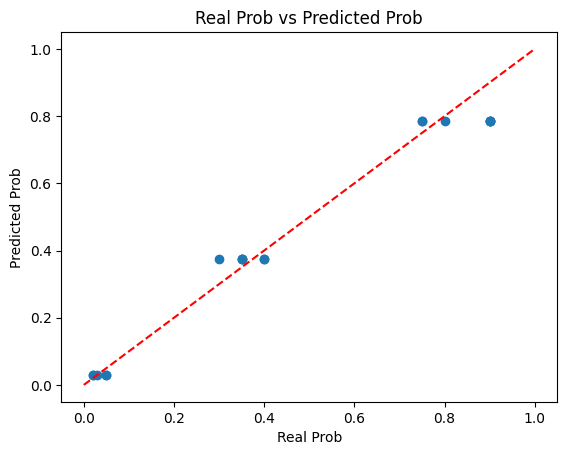

In [66]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, Y_pred)
plt.xlabel('Real Prob')
plt.ylabel('Predicted Prob')
plt.title('Real Prob vs Predicted Prob')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

In [68]:
#Comparing real values with predictions
Y_pred = model.predict(X_test)
comparison = pd.DataFrame({'Real Values': Y_test, 'Predicted Values': Y_pred, 'Diff': Y_test-Y_pred})
print(comparison.head(25))

    Real Values  Predicted Values      Diff
13         0.35          0.375000 -0.025000
39         0.90          0.785000  0.115000
30         0.90          0.785000  0.115000
45         0.80          0.785000  0.015000
17         0.05          0.030909  0.019091
48         0.75          0.785000 -0.035000
26         0.03          0.030909 -0.000909
25         0.35          0.375000 -0.025000
32         0.02          0.030909 -0.010909
19         0.30          0.375000 -0.075000
12         0.90          0.785000  0.115000
4          0.40          0.375000  0.025000
37         0.35          0.375000 -0.025000
8          0.02          0.030909 -0.010909
3          0.90          0.785000  0.115000
6          0.75          0.785000 -0.035000
41         0.05          0.030909  0.019091
46         0.40          0.375000  0.025000
